In [16]:
import numpy as np
num_ciudades = 100
np.random.seed(0)  
ciudades = np.random.randint(0, 100, size=(num_ciudades, 2))
print("Coordenadas de las ciudades generadas:")
for i, ciudad in enumerate(ciudades):
    print(f"Ciudad {i+1}: ({ciudad[0]}, {ciudad[1]})")

Coordenadas de las ciudades generadas:
Ciudad 1: (44, 47)
Ciudad 2: (64, 67)
Ciudad 3: (67, 9)
Ciudad 4: (83, 21)
Ciudad 5: (36, 87)
Ciudad 6: (70, 88)
Ciudad 7: (88, 12)
Ciudad 8: (58, 65)
Ciudad 9: (39, 87)
Ciudad 10: (46, 88)
Ciudad 11: (81, 37)
Ciudad 12: (25, 77)
Ciudad 13: (72, 9)
Ciudad 14: (20, 80)
Ciudad 15: (69, 79)
Ciudad 16: (47, 64)
Ciudad 17: (82, 99)
Ciudad 18: (88, 49)
Ciudad 19: (29, 19)
Ciudad 20: (19, 14)
Ciudad 21: (39, 32)
Ciudad 22: (65, 9)
Ciudad 23: (57, 32)
Ciudad 24: (31, 74)
Ciudad 25: (23, 35)
Ciudad 26: (75, 55)
Ciudad 27: (28, 34)
Ciudad 28: (0, 0)
Ciudad 29: (36, 53)
Ciudad 30: (5, 38)
Ciudad 31: (17, 79)
Ciudad 32: (4, 42)
Ciudad 33: (58, 31)
Ciudad 34: (1, 65)
Ciudad 35: (41, 57)
Ciudad 36: (35, 11)
Ciudad 37: (46, 82)
Ciudad 38: (91, 0)
Ciudad 39: (14, 99)
Ciudad 40: (53, 12)
Ciudad 41: (42, 84)
Ciudad 42: (75, 68)
Ciudad 43: (6, 68)
Ciudad 44: (47, 3)
Ciudad 45: (76, 52)
Ciudad 46: (78, 15)
Ciudad 47: (20, 99)
Ciudad 48: (58, 23)
Ciudad 49: (79, 13)
C

In [17]:
from scipy.spatial import distance

def calcular_distancia(ciudad1, ciudad2):
    return distance.euclidean(ciudad1, ciudad2)

def calcular_longitud_ruta(ruta, ciudades):
    longitud = 0
    for i in range(len(ruta) - 1):
        longitud += calcular_distancia(ciudades[ruta[i]], ciudades[ruta[i+1]])
    longitud += calcular_distancia(ciudades[ruta[-1]], ciudades[ruta[0]])  
    return longitud

def aco_tsp(ciudades, num_hormigas=10, iteraciones=100, feromona_inicial=1, evaporacion=0.5, alpha=1, beta=2):
    num_ciudades = len(ciudades)
    feromonas = np.ones((num_ciudades, num_ciudades)) * feromona_inicial

    mejor_ruta = None
    mejor_longitud = np.inf

    for _ in range(iteraciones):
        for hormiga in range(num_hormigas):
            ruta_actual = []
            ciudad_actual = np.random.randint(num_ciudades)
            ciudades_no_visitadas = set(range(num_ciudades))
            ciudades_no_visitadas.remove(ciudad_actual)

            while ciudades_no_visitadas:
                probabilidades = []
                denominador_probabilidades = 0
                for ciudad in ciudades_no_visitadas:
                    probabilidad = (feromonas[ciudad_actual][ciudad] ** alpha) * \
                                   ((1 / calcular_distancia(ciudades[ciudad_actual], ciudades[ciudad])) ** beta)
                    probabilidades.append(probabilidad)
                    denominador_probabilidades += probabilidad

                probabilidades = [p / denominador_probabilidades for p in probabilidades]
                siguiente_ciudad = np.random.choice(list(ciudades_no_visitadas), p=probabilidades)

                ruta_actual.append(ciudad_actual)
                ciudades_no_visitadas.remove(siguiente_ciudad)
                ciudad_actual = siguiente_ciudad

            ruta_actual.append(ciudad_actual)

            longitud_ruta_actual = calcular_longitud_ruta(ruta_actual, ciudades)
            if longitud_ruta_actual < mejor_longitud:
                mejor_longitud = longitud_ruta_actual
                mejor_ruta = ruta_actual

            for i in range(len(ruta_actual) - 1):
                ciudad_inicio = ruta_actual[i]
                ciudad_fin = ruta_actual[i + 1]
                feromonas[ciudad_inicio][ciudad_fin] = (1 - evaporacion) * feromonas[ciudad_inicio][ciudad_fin] + \
                                                        evaporacion / longitud_ruta_actual

        evaporacion *= 0.9  # aqui reducimos la taza de evaporación

    return mejor_ruta, mejor_longitud
ruta_optima, longitud_optima = aco_tsp(ciudades)
print("Ruta óptima encontrada:", ruta_optima)
print("Longitud óptima:", longitud_optima)


Ruta óptima encontrada: [5, 14, 97, 36, 15, 62, 25, 68, 49, 17, 66, 32, 64, 48, 45, 80, 86, 2, 21, 18, 94, 98, 93, 76, 35, 95, 24, 20, 78, 0, 61, 28, 70, 34, 26, 51, 55, 77, 39, 22, 47, 31, 74, 54, 40, 84, 58, 79, 91, 72, 82, 89, 90, 33, 13, 11, 16, 53, 41, 92, 50, 88, 96, 44, 10, 75, 83, 6, 37, 12, 43, 73, 27, 60, 19, 69, 81, 67, 3, 87, 71, 1, 7, 38, 30, 46, 85, 57, 63, 56, 8, 4, 29, 59, 23, 9, 42, 99, 52, 65]
Longitud óptima: 1958.5088406446737


finalmente solo resta mostrar graficamente la ruta elegida por el algoritmo como la más optima. para esto usamos la librería matplotlib y le enviamos el arreglo que contiene las coordenadas de x e y de cada una de las ciudades.

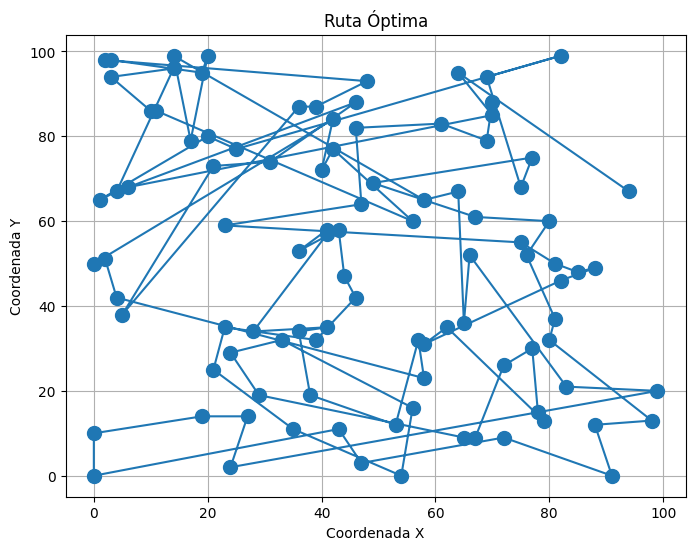

In [18]:
import matplotlib.pyplot as plt

def visualizar_ruta(ciudades, ruta):
    x = [ciudades[i][0] for i in ruta]
    y = [ciudades[i][1] for i in ruta]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', markersize=10)
    plt.title("Ruta Óptima")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(True)
    plt.show()
visualizar_ruta(ciudades, ruta_optima)